<h1 style="background:#339966; color:#fff; padding:8px; text-align:center;">The Sparks Foundation :  GRIP  Jan-2021</h1>
<h2>Task-1 : Pridiction Using Supervised Machine Learning</h2>
<p><b>Description :</b> Predict the Score of students based on the no. of study-hours.</p>
<h3>Name -  Chitranjan Gupta</h3>

<h2>________________________________________________________________________</h2>

### 1. Import Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Libraries for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split # -> For splitting original data into train and test data

from sklearn.linear_model import LinearRegression # -> Algorithm to be used for our predictions

from sklearn.metrics import mean_absolute_error # -> To check the fit of the model on our data

<h2>________________________________________________________________________</h2>

### 2. Load the Data

In [2]:
path = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(path)

In [3]:
# Reading the first five values from obtained data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the shape of data
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Describe the data to check for central tendancies
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Check for NULL values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h2>________________________________________________________________________</h2>

### 3. Data Visualization

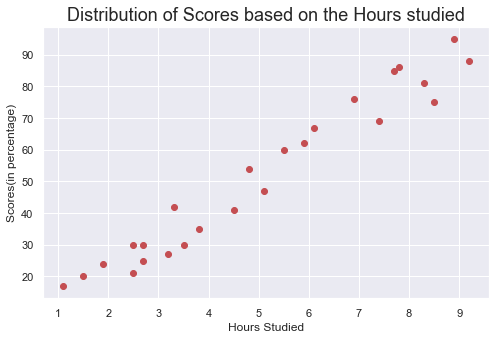

In [8]:
# Let's check the distribution of scores throughout the data

plt.figure(figsize=(8,5))
plt.scatter(data['Hours'], data['Scores'], color='r')
plt.xlabel('Hours Studied')
plt.ylabel('Scores(in percentage)')
plt.title('Distribution of Scores based on the Hours studied', fontsize=18)
plt.show()

**Insight :**<br>
From the above obtained graph, we can clearly depict that there is a positive linear relation<br>*i.e.,* ***The Students who study more no. of hours, usually scores higher marks***

<h2>________________________________________________________________________</h2>

### 4. Preparing the data

In [9]:
# Separating the input(Hours) and output(Scores) variables

hours = data.iloc[:, :1].values  
scores = data.iloc[:, 1].values


In [10]:
# Splitting the data into train and test data using ScikitLearn's train_test_split

X_train, X_test, y_train, y_test = train_test_split(hours, scores, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

<h2>________________________________________________________________________</h2>

### 5. Model Training

In [13]:
# We are using Linear Regression algorithm as the data involves just 2 features.

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

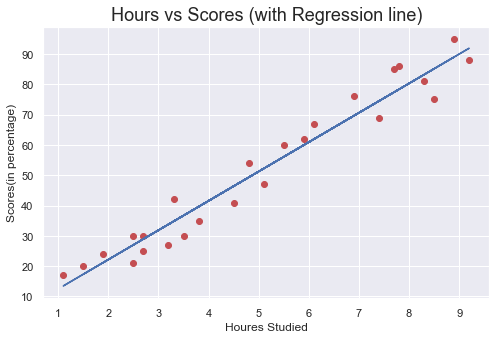

In [14]:
# Plotting the Regression Line
line = linreg.coef_ * hours + linreg.intercept_

plt.figure(figsize=(8,5))
plt.scatter(hours, scores, color='r')
plt.plot(hours, line)
plt.xlabel('Houres Studied')
plt.ylabel('Scores(in percentage)')
plt.title('Hours vs Scores (with Regression line)', fontsize=18)
plt.show()

<h2>________________________________________________________________________</h2>

### 6. Generate Predictions

In [15]:
# getting Predictions
y_pred = linreg.predict(X_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [16]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


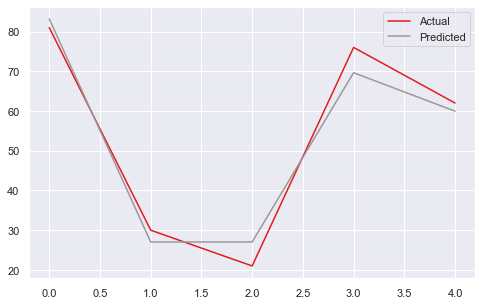

In [18]:
# Let's check the trend for Actual and Predicted values
df.plot(cmap='Set1', figsize=(8,5))
plt.show()

**Insight :** As it seems from the above graph, our predictions were almost accurate.<br>
***Let's find out the Mean_Absolute_Error to check how well the algorithm fit to the data***

<h2>________________________________________________________________________</h2>

### 7. Model Evaluation

In [19]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


<h2>________________________________________________________________________</h2>

### 8. Final Prediction
**Now, that our model is trained, Predict the Score of a Student if he/she studies for `9.25 hours`**

In [20]:
hrs = float(input())
final_pred = linreg.predict([[hrs]])
print("Predicted Score for Student who studies for '{}' hours is '{}'".format(hrs, round(final_pred[0], 2)))

9.25
Predicted Score for Student who studies for '9.25' hours is '92.39'


# Thank You